# Amazon Reviews Sentiment Analysis

## 1.Import Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP & Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


## 2.Creating a Sample Amazon Reviews Dataset

In [4]:
import pandas as pd

# Sample data
data = {
    "Review": [
        "This product is amazing, I love it!",
        "Terrible quality, very disappointed",
        "Excellent value for money, highly recommend",
        "Not worth the price, broke after one use",
        "Satisfied with the purchase, good quality",
        "Worst product ever, do not buy"
    ],
    "Sentiment": [
        "Positive",
        "Negative",
        "Positive",
        "Negative",
        "Positive",
        "Negative"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv("amazon_reviews.csv", index=False)
print("Sample CSV created successfully!")



Sample CSV created successfully!


## 3.Load Dataset

In [5]:
# Load the dataset
df = pd.read_csv("amazon_reviews.csv")
df = df.dropna()
df.head()

,Review,Sentiment
0,"This product is amazing, I love it!",Positive
1,"Terrible quality, very disappointed",Negative
2,"Excellent value for money, highly recommend",Positive
3,"Not worth the price, broke after one use",Negative
4,"Satisfied with the purchase, good quality",Positive


## 3.Preprocessing

In [6]:
# Download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()

# Preprocessing function
def preprocess(text):
    text = text.lower()  # lowercase
    text = "".join([c for c in text if c.isalpha() or c == " "])  # keep letters & spaces
    tokens = [ps.stem(w) for w in text.split() if w not in stop_words]  # remove stopwords + stem
    return " ".join(tokens)

# Apply preprocessing
df["Cleaned"] = df["Review"].apply(preprocess)

# Save cleaned data
df.to_csv("amazon_reviews_cleaned.csv", index=False)

# Preview cleaned data
print(df.head())

                                        Review Sentiment  \
0          This product is amazing, I love it!  Positive   
1          Terrible quality, very disappointed  Negative   
2  Excellent value for money, highly recommend  Positive   
3     Not worth the price, broke after one use  Negative   
4    Satisfied with the purchase, good quality  Positive   

                             Cleaned  
0                  product amaz love  
1         terribl qualiti disappoint  
2  excel valu money highli recommend  
3          worth price broke one use  
4       satisfi purchas good qualiti  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## 4.Visualization (WordClouds)

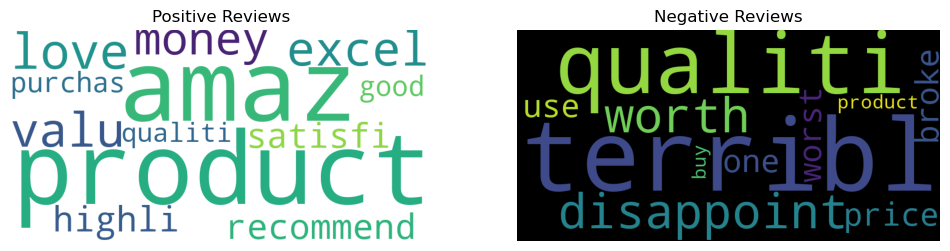

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

# Create folder for images if it doesn't exist
os.makedirs("images", exist_ok=True)

# Separate text by sentiment
positive_text = " ".join(df[df["Sentiment"]=="Positive"]["Cleaned"])
negative_text = " ".join(df[df["Sentiment"]=="Negative"]["Cleaned"])

# Generate WordClouds
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color="black").generate(negative_text)

# Plot side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos)
plt.title("Positive Reviews")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg)
plt.title("Negative Reviews")
plt.axis("off")

plt.savefig("images/review_wordcloud.png")
plt.show()

## 5.Machine Learning Model (TF-IDF + Logistic Regression)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Features and target
X = df["Cleaned"]
y = df["Sentiment"]

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=2000)
X_vec = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.0
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       1.0
    Positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



## 6.Confusion Matrix


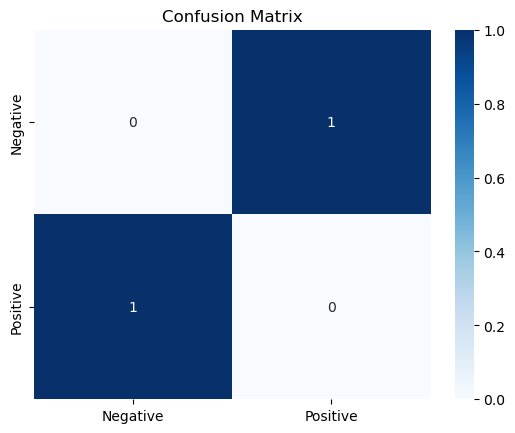

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.savefig("images/confusion_matrix.png")
plt.show()

## 7.Interview Notes (Markdown)

In [13]:
from IPython.display import Markdown as md

md("""
### 🧠 Interview Notes
- **Why TF-IDF?** → Reduces noise by weighting rare words higher.
- **Why Logistic Regression?** → Strong baseline for text classification.
- **Limitations?** → Doesn’t handle word order; deep learning can improve.
- **Real-world challenge?** → Class imbalance (more positives than negatives).
""")


### 🧠 Interview Notes
- **Why TF-IDF?** → Reduces noise by weighting rare words higher.
- **Why Logistic Regression?** → Strong baseline for text classification.
- **Limitations?** → Doesn’t handle word order; deep learning can improve.
- **Real-world challenge?** → Class imbalance (more positives than negatives).
